### Assignment 6 - Image Classification with CNN and CIFAR-10 dataset
#### Natalie Kim
The objective is to build an image classifier that is capable of properly identifying four different categories of image. 

The data consists of various train and test samples across the four categories of image. You will notice that the data for a specific category is a singular image that has been flipped, rotated, or slightly altered in some way. 

### Setup/import

In [1]:
import tensorflow as tf
from tensorflow import keras

#### Data for HW

In [11]:
import os
import numpy as np
from PIL import Image
import pickle

def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

def create_image_folders(base_dir, label_names):
    os.makedirs(base_dir, exist_ok=True)
    for label_name in label_names:
        os.makedirs(os.path.join(base_dir, label_name.decode('utf-8')), exist_ok=True)

def save_images_from_batch(batch_file, base_dir, label_names):
    batch_data = unpickle(batch_file)
    data = batch_data[b'data']
    labels = batch_data[b'labels']
    for i, (img_data, label) in enumerate(zip(data, labels)):
        image = img_data.reshape(3, 32, 32).transpose(1, 2, 0)  # Convert to 32x32x3 RGB image
        image = Image.fromarray(image)
        label_name = label_names[label].decode('utf-8')
        image.save(os.path.join(base_dir, label_name, f'image_{i}.png'))

batch_files = ['/Users/nataliekim/Library/CloudStorage/OneDrive-TheUniversityofChicago/machine learning/ml data/cifar-10-batches-py/data_batch_1',
               '/Users/nataliekim/Library/CloudStorage/OneDrive-TheUniversityofChicago/machine learning/ml data/cifar-10-batches-py/data_batch_2',
               '/Users/nataliekim/Library/CloudStorage/OneDrive-TheUniversityofChicago/machine learning/ml data/cifar-10-batches-py/data_batch_3',
               '/Users/nataliekim/Library/CloudStorage/OneDrive-TheUniversityofChicago/machine learning/ml data/cifar-10-batches-py/data_batch_4',
               '/Users/nataliekim/Library/CloudStorage/OneDrive-TheUniversityofChicago/machine learning/ml data/cifar-10-batches-py/data_batch_5']
base_dir = '/Users/nataliekim/Desktop' 

# label names
meta_data = unpickle('/Users/nataliekim/Library/CloudStorage/OneDrive-TheUniversityofChicago/machine learning/ml data/cifar-10-batches-py/batches.meta')
label_names = meta_data[b'label_names']

# create directories for each label
create_image_folders(base_dir, label_names)


for batch_file in batch_files:
    save_images_from_batch(batch_file, base_dir, label_names)

In [27]:
import random
random.seed(42)

### 1. Data Processing: 
The train & test data is pretty clean in terms of image data, but we will need to do a bit of prep work to use in our model. 
Specifically, as discussed in class you will need to augment the train dataset, and split it into train and validation.

#### a) Use the ImageDataGenerator() class from keras.processing.image to build out an instance called "train_datagen" with the following parameters: 
- rescale = 1./255
- shear_range = 0.2
- zoom_range = 0.2
- horizontal_flip = True

In [33]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    validation_split=0.2
)

#### b) Then build your training set by using the method flow_from_directory() for training and validation
- path (where training data is stored)
- target_size = (64, 64)
- batch_size = 32
- class_mode = categorical 

In [38]:
train_generator = train_datagen.flow_from_directory(
    directory = base_dir,
    target_size = (64, 64),
    batch_size = 32,
    class_mode = 'categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    directory = base_dir,
    target_size = (64, 64),
    batch_size = 32,
    class_mode = 'categorical',
    subset = 'validation'
)

Found 32908 images belonging to 10 classes.
Found 8221 images belonging to 10 classes.


#### c) Take a look at your training and validation sets: 
##### What is the image shape of each training observation?
(64, 64) pixels and 3 color channels
##### How many total classes do we need to predict on? 
10 classes

### 2. Initial Classifier Build: 
Now use keras to build an initial CNN image classifier using APIs such as Sequential(), Conv2D(), MaxPooling2D(), and Flatten().

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

In [39]:
model = Sequential([
    Input(shape=(64, 64, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

In [40]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### 3. Model Runs: 
This will be run various times with different numbers of epochs - you can also try with different number of steps_per_epoch

#### a) Use fit() with the training set (Note - depending on your machine this may take a few hours, so do not wait till the last or last-1 day to complete this assignment). For the first run, use the following parameters: 
- epochs = 30
- steps_per_epoch = 625

In [41]:
r = model.fit(
    train_generator,
    steps_per_epoch=625,
    epochs=30,
    validation_data = validation_generator
)

Epoch 1/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 36s 56ms/step - accuracy: 0.2696 - loss: 1.9654 - val_accuracy: 0.4624 - val_loss: 1.4939
Epoch 2/30
403/625 ━━━━━━━━━━━━━━━━━━━━ 10s 49ms/step - accuracy: 0.4485 - loss: 1.5233

2024-05-01 10:02:10.513985: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 42ms/step - accuracy: 0.4519 - loss: 1.5133 - val_accuracy: 0.5094 - val_loss: 1.3581
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 37s 58ms/step - accuracy: 0.5068 - loss: 1.3842 - val_accuracy: 0.5735 - val_loss: 1.2058
Epoch 4/30
404/625 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - accuracy: 0.5562 - loss: 1.2556

2024-05-01 10:03:13.792810: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - accuracy: 0.5588 - loss: 1.2495 - val_accuracy: 0.6032 - val_loss: 1.1115
Epoch 5/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 37s 58ms/step - accuracy: 0.5797 - loss: 1.1921 - val_accuracy: 0.5938 - val_loss: 1.1546
Epoch 6/30
404/625 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - accuracy: 0.6070 - loss: 1.1292

2024-05-01 10:04:17.437697: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


625/625 ━━━━━━━━━━━━━━━━━━━━ 28s 44ms/step - accuracy: 0.6103 - loss: 1.1207 - val_accuracy: 0.6305 - val_loss: 1.0540
Epoch 7/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 36s 58ms/step - accuracy: 0.6327 - loss: 1.0639 - val_accuracy: 0.6340 - val_loss: 1.0484
Epoch 8/30
403/625 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - accuracy: 0.6590 - loss: 0.9886

2024-05-01 10:05:21.322531: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 42ms/step - accuracy: 0.6579 - loss: 0.9903 - val_accuracy: 0.6716 - val_loss: 0.9261
Epoch 9/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 37s 59ms/step - accuracy: 0.6580 - loss: 0.9829 - val_accuracy: 0.6769 - val_loss: 0.9309
Epoch 10/30
403/625 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - accuracy: 0.6717 - loss: 0.9411

2024-05-01 10:06:25.349855: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 42ms/step - accuracy: 0.6710 - loss: 0.9399 - val_accuracy: 0.6854 - val_loss: 0.9074
Epoch 11/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 67ms/step - accuracy: 0.6863 - loss: 0.9137 - val_accuracy: 0.6974 - val_loss: 0.8665
Epoch 12/30
404/625 ━━━━━━━━━━━━━━━━━━━━ 17s 78ms/step - accuracy: 0.6979 - loss: 0.8862

2024-05-01 10:07:44.100938: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 65ms/step - accuracy: 0.6979 - loss: 0.8849 - val_accuracy: 0.6964 - val_loss: 0.8628
Epoch 13/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 60s 96ms/step - accuracy: 0.7051 - loss: 0.8543 - val_accuracy: 0.7008 - val_loss: 0.8568
Epoch 14/30
404/625 ━━━━━━━━━━━━━━━━━━━━ 15s 72ms/step - accuracy: 0.7071 - loss: 0.8515

2024-05-01 10:09:22.532617: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 61ms/step - accuracy: 0.7065 - loss: 0.8509 - val_accuracy: 0.7135 - val_loss: 0.8240
Epoch 15/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 78ms/step - accuracy: 0.7162 - loss: 0.8106 - val_accuracy: 0.7178 - val_loss: 0.8054
Epoch 16/30
404/625 ━━━━━━━━━━━━━━━━━━━━ 14s 66ms/step - accuracy: 0.7305 - loss: 0.7905

2024-05-01 10:10:47.377286: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


625/625 ━━━━━━━━━━━━━━━━━━━━ 34s 54ms/step - accuracy: 0.7261 - loss: 0.8004 - val_accuracy: 0.7093 - val_loss: 0.8373
Epoch 17/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 76ms/step - accuracy: 0.7244 - loss: 0.8045 - val_accuracy: 0.7221 - val_loss: 0.7974
Epoch 18/30
404/625 ━━━━━━━━━━━━━━━━━━━━ 13s 63ms/step - accuracy: 0.7376 - loss: 0.7603

2024-05-01 10:12:07.135974: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


625/625 ━━━━━━━━━━━━━━━━━━━━ 34s 54ms/step - accuracy: 0.7365 - loss: 0.7623 - val_accuracy: 0.6944 - val_loss: 0.8803
Epoch 19/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 74ms/step - accuracy: 0.7296 - loss: 0.7777 - val_accuracy: 0.7291 - val_loss: 0.7858
Epoch 20/30
404/625 ━━━━━━━━━━━━━━━━━━━━ 14s 65ms/step - accuracy: 0.7402 - loss: 0.7506

2024-05-01 10:13:28.312151: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


625/625 ━━━━━━━━━━━━━━━━━━━━ 34s 54ms/step - accuracy: 0.7382 - loss: 0.7553 - val_accuracy: 0.7034 - val_loss: 0.8614
Epoch 21/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 73ms/step - accuracy: 0.7415 - loss: 0.7486 - val_accuracy: 0.7335 - val_loss: 0.7863
Epoch 22/30
404/625 ━━━━━━━━━━━━━━━━━━━━ 13s 60ms/step - accuracy: 0.7523 - loss: 0.7193

2024-05-01 10:14:45.782459: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


625/625 ━━━━━━━━━━━━━━━━━━━━ 31s 50ms/step - accuracy: 0.7505 - loss: 0.7193 - val_accuracy: 0.7231 - val_loss: 0.8132
Epoch 23/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 45s 71ms/step - accuracy: 0.7484 - loss: 0.7401 - val_accuracy: 0.7349 - val_loss: 0.7775
Epoch 24/30
404/625 ━━━━━━━━━━━━━━━━━━━━ 13s 59ms/step - accuracy: 0.7524 - loss: 0.7012

2024-05-01 10:16:01.737000: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


625/625 ━━━━━━━━━━━━━━━━━━━━ 32s 51ms/step - accuracy: 0.7516 - loss: 0.7035 - val_accuracy: 0.7463 - val_loss: 0.7501
Epoch 25/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 73ms/step - accuracy: 0.7519 - loss: 0.7166 - val_accuracy: 0.7387 - val_loss: 0.7559
Epoch 26/30
404/625 ━━━━━━━━━━━━━━━━━━━━ 13s 60ms/step - accuracy: 0.7625 - loss: 0.6916

2024-05-01 10:17:19.989816: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


625/625 ━━━━━━━━━━━━━━━━━━━━ 33s 53ms/step - accuracy: 0.7640 - loss: 0.6866 - val_accuracy: 0.7443 - val_loss: 0.7656
Epoch 27/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 45s 71ms/step - accuracy: 0.7633 - loss: 0.6892 - val_accuracy: 0.7376 - val_loss: 0.7702
Epoch 28/30
404/625 ━━━━━━━━━━━━━━━━━━━━ 13s 62ms/step - accuracy: 0.7638 - loss: 0.6875

2024-05-01 10:18:38.341837: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


625/625 ━━━━━━━━━━━━━━━━━━━━ 32s 52ms/step - accuracy: 0.7635 - loss: 0.6883 - val_accuracy: 0.7425 - val_loss: 0.7646
Epoch 29/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 75ms/step - accuracy: 0.7635 - loss: 0.6769 - val_accuracy: 0.7410 - val_loss: 0.7633
Epoch 30/30
404/625 ━━━━━━━━━━━━━━━━━━━━ 14s 65ms/step - accuracy: 0.7629 - loss: 0.6729

2024-05-01 10:19:59.437449: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


625/625 ━━━━━━━━━━━━━━━━━━━━ 35s 55ms/step - accuracy: 0.7642 - loss: 0.6696 - val_accuracy: 0.7492 - val_loss: 0.7509


#### b) plot the training and validation loss and save the image file

In [22]:
import matplotlib.pyplot as plt

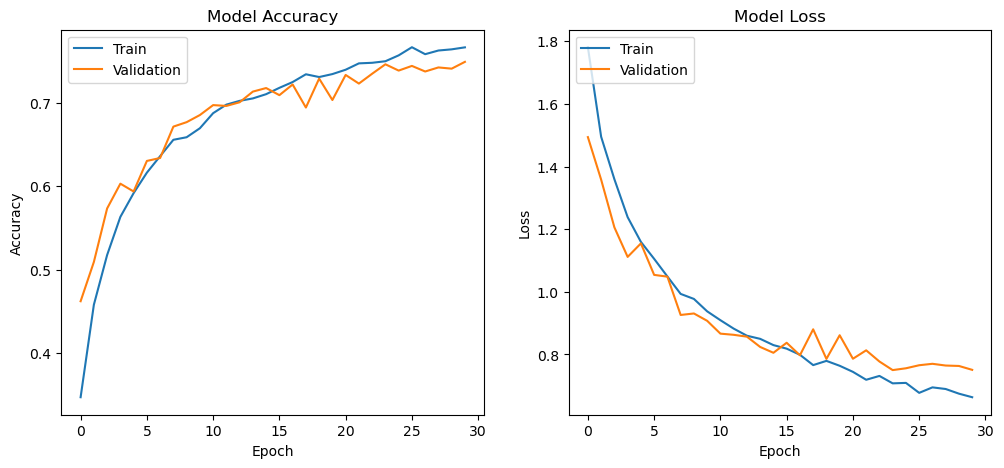

In [42]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(r.history['accuracy'])
if 'val_accuracy' in r.history:
    plt.plot(r.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(r.history['loss'])
if 'val_loss' in r.history:
    plt.plot(r.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

#### c) save model to a file

In [44]:
model.save('cifar10_model.keras')

#### d) Predict using the saved model and the test dataset. Remember to use ImageDataGenerator() without any data augmentation.

In [45]:
from tensorflow.keras.models import load_model

In [54]:
test_batch_file = '/Users/nataliekim/Library/CloudStorage/OneDrive-TheUniversityofChicago/machine learning/ml data/cifar-10-batches-py/test_batch'

def save_images_from_batch(batch_file, base_dir, label_names, subfolder="test"):
    batch_data = unpickle(batch_file)
    data = batch_data[b'data']
    labels = batch_data[b'labels']
    for i, (img_data, label) in enumerate(zip(data, labels)):
        image = img_data.reshape(3, 32, 32).transpose(1, 2, 0)  # Convert to 32x32x3 RGB image
        image = Image.fromarray(image)
        label_name = label_names[label].decode('utf-8')
        # Create a subdirectory for test images
        class_dir = os.path.join(base_dir, label_name, subfolder)
        os.makedirs(class_dir, exist_ok=True)
        image.save(os.path.join(class_dir, f'test_image_{i}.png'))

save_images_from_batch(test_batch_file, base_dir, label_names)

In [70]:
model = load_model('cifar10_model.keras')

# initialize the data generator for the test data
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

# test data generator
test_generator = test_datagen.flow_from_directory(
    directory = base_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# predict output
predictions = model.predict(test_generator, steps=len(test_generator))
predicted_classes = np.argmax(predictions, axis=1)

/opt/anaconda3/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Found 51129 images belonging to 10 classes.
  11/1598 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step

/opt/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1598/1598 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step


#### e) Determine accuracy.

In [56]:
from sklearn.metrics import accuracy_score

In [77]:
# Get the actual labels from the generator
true_classes = test_generator.classes

# Calculate the accuracy
accuracy = accuracy_score(true_classes, predicted_classes)
print(f'Accuracy on the test set: {accuracy:.4f}')

Accuracy on the test set: 0.8018


#### f) Run this process for the following combinations:

- (steps_per_epoch: 100, epochs: 2)
- (steps_per_epoch: 250, epochs: 2)
- (steps_per_epoch: 500, epochs: 2)
- (steps_per_epoch: 100, epochs: 5)
- (steps_per_epoch: 250, epochs: 5)
- (steps_per_epoch: 500, epochs: 5)
- (steps_per_epoch: 100, epochs: 9)
- (steps_per_epoch: 250, epochs: 9)
- (steps_per_epoch: 500, epochs: 9)
- (steps_per_epoch: 5, epochs: 10)

In [60]:
combinations = [
    (100, 2),
    (250, 2),
    (500, 2),
    (100, 5),
    (250, 5),
    (500, 5),
    (100, 9),
    (250, 9),
    (500, 9),
    (5, 10)
]

In [62]:
results = []

for steps_per_epoch, epochs in combinations:
    history = model.fit(
        train_generator,
        steps_per_epoch = steps_per_epoch,
        epochs=epochs,
        validation_data = validation_generator
    )

    # predictions
    predictions_loop = model.predict(test_generator, steps=len(test_generator))
    predicted_classes_loop = np.argmax(predictions_loop, axis=1)
    
    # accuracy
    accuracy = accuracy_score(true_classes, predicted_classes_loop)

    results.append((steps_per_epoch, epochs, accuracy))
    print(f'Done with steps_per_epoch = {steps_per_epoch}, epochs = {epochs}, Accuracy = {accuracy:.2f}')

Epoch 1/2
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 108ms/step - accuracy: 0.1681 - loss: 2.2473 - val_accuracy: 0.3059 - val_loss: 1.8556
Epoch 2/2
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 97ms/step - accuracy: 0.2970 - loss: 1.8887 - val_accuracy: 0.3627 - val_loss: 1.7526
1598/1598 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step
Done with steps_per_epoch = 100, epochs = 2, Accuracy = 0.37
Epoch 1/2
250/250 ━━━━━━━━━━━━━━━━━━━━ 18s 70ms/step - accuracy: 0.1971 - loss: 2.1463 - val_accuracy: 0.3740 - val_loss: 1.7095
Epoch 2/2
250/250 ━━━━━━━━━━━━━━━━━━━━ 19s 75ms/step - accuracy: 0.3643 - loss: 1.7227 - val_accuracy: 0.4268 - val_loss: 1.5623
1598/1598 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step
Done with steps_per_epoch = 250, epochs = 2, Accuracy = 0.42
Epoch 1/2
500/500 ━━━━━━━━━━━━━━━━━━━━ 31s 61ms/step - accuracy: 0.2467 - loss: 2.0446 - val_accuracy: 0.4087 - val_loss: 1.6098
Epoch 2/2
500/500 ━━━━━━━━━━━━━━━━━━━━ 30s 61ms/step - accuracy: 0.4230 - loss: 1.6013 - val_accuracy: 0.4945 - val_loss: 1.3972
1598/1598 ━━━

2024-05-01 11:03:33.114166: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/opt/anaconda3/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


250/250 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.4859 - loss: 1.4813 - val_accuracy: 0.5162 - val_loss: 1.3564
1598/1598 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step
Done with steps_per_epoch = 250, epochs = 5, Accuracy = 0.52
Epoch 1/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 34s 66ms/step - accuracy: 0.2214 - loss: 2.0804 - val_accuracy: 0.4136 - val_loss: 1.6047
Epoch 2/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 34s 67ms/step - accuracy: 0.3999 - loss: 1.6427 - val_accuracy: 0.4655 - val_loss: 1.5157
Epoch 3/5
 28/500 ━━━━━━━━━━━━━━━━━━━━ 24s 51ms/step - accuracy: 0.4174 - loss: 1.5745

2024-05-01 11:05:10.258998: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/opt/anaconda3/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


500/500 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.4486 - loss: 1.5152 - val_accuracy: 0.4867 - val_loss: 1.4210
Epoch 4/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 34s 69ms/step - accuracy: 0.4697 - loss: 1.4714 - val_accuracy: 0.5223 - val_loss: 1.3364
Epoch 5/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 36s 72ms/step - accuracy: 0.5250 - loss: 1.3421 - val_accuracy: 0.5682 - val_loss: 1.2022
1598/1598 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step
Done with steps_per_epoch = 500, epochs = 5, Accuracy = 0.58
Epoch 1/9
100/100 ━━━━━━━━━━━━━━━━━━━━ 14s 133ms/step - accuracy: 0.1679 - loss: 2.2264 - val_accuracy: 0.3009 - val_loss: 1.8526
Epoch 2/9
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 119ms/step - accuracy: 0.2965 - loss: 1.9458 - val_accuracy: 0.3967 - val_loss: 1.7347
Epoch 3/9
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 118ms/step - accuracy: 0.3553 - loss: 1.7359 - val_accuracy: 0.4142 - val_loss: 1.6608
Epoch 4/9
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 116ms/step - accuracy: 0.4208 - loss: 1.6263 - val_accuracy: 0.4475 - val_loss: 1.542

2024-05-01 11:10:40.654616: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/opt/anaconda3/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.4933 - loss: 1.4068 - val_accuracy: 0.5181 - val_loss: 1.3439
Epoch 6/9
250/250 ━━━━━━━━━━━━━━━━━━━━ 23s 91ms/step - accuracy: 0.5096 - loss: 1.3737 - val_accuracy: 0.5453 - val_loss: 1.2794
Epoch 7/9
250/250 ━━━━━━━━━━━━━━━━━━━━ 22s 87ms/step - accuracy: 0.5394 - loss: 1.2917 - val_accuracy: 0.5923 - val_loss: 1.1766
Epoch 8/9
250/250 ━━━━━━━━━━━━━━━━━━━━ 22s 90ms/step - accuracy: 0.5589 - loss: 1.2568 - val_accuracy: 0.6120 - val_loss: 1.1181
Epoch 9/9
250/250 ━━━━━━━━━━━━━━━━━━━━ 22s 89ms/step - accuracy: 0.5740 - loss: 1.2043 - val_accuracy: 0.6013 - val_loss: 1.1180
1598/1598 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step
Done with steps_per_epoch = 250, epochs = 9, Accuracy = 0.63
Epoch 1/9
500/500 ━━━━━━━━━━━━━━━━━━━━ 38s 76ms/step - accuracy: 0.2433 - loss: 2.0261 - val_accuracy: 0.4384 - val_loss: 1.5487
Epoch 2/9
500/500 ━━━━━━━━━━━━━━━━━━━━ 37s 75ms/step - accuracy: 0.4308 - loss: 1.5587 - val_accuracy: 0.5007 - val_loss: 1.3764
Ep

2024-05-01 11:14:02.025963: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/opt/anaconda3/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


500/500 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.4958 - loss: 1.3895 - val_accuracy: 0.5131 - val_loss: 1.3897
Epoch 4/9
500/500 ━━━━━━━━━━━━━━━━━━━━ 37s 74ms/step - accuracy: 0.5092 - loss: 1.3745 - val_accuracy: 0.5597 - val_loss: 1.2474
Epoch 5/9
500/500 ━━━━━━━━━━━━━━━━━━━━ 38s 75ms/step - accuracy: 0.5474 - loss: 1.2678 - val_accuracy: 0.6080 - val_loss: 1.1137
Epoch 6/9
 28/500 ━━━━━━━━━━━━━━━━━━━━ 26s 57ms/step - accuracy: 0.5836 - loss: 1.2037

2024-05-01 11:15:25.503318: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


500/500 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.5871 - loss: 1.1940 - val_accuracy: 0.6056 - val_loss: 1.1085
Epoch 7/9
500/500 ━━━━━━━━━━━━━━━━━━━━ 36s 72ms/step - accuracy: 0.5817 - loss: 1.1774 - val_accuracy: 0.6266 - val_loss: 1.0511
Epoch 8/9
500/500 ━━━━━━━━━━━━━━━━━━━━ 36s 72ms/step - accuracy: 0.6185 - loss: 1.0874 - val_accuracy: 0.6463 - val_loss: 1.0020
Epoch 9/9
 29/500 ━━━━━━━━━━━━━━━━━━━━ 27s 57ms/step - accuracy: 0.6399 - loss: 1.0175

2024-05-01 11:16:46.661374: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


500/500 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.6512 - loss: 1.0017 - val_accuracy: 0.6447 - val_loss: 1.0188
1598/1598 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step
Done with steps_per_epoch = 500, epochs = 9, Accuracy = 0.68
Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.1060 - loss: 2.3053 - val_accuracy: 0.0999 - val_loss: 2.3399
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.1562 - loss: 2.3081 - val_accuracy: 0.1322 - val_loss: 2.2998
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.2101 - loss: 2.2810 - val_accuracy: 0.0996 - val_loss: 2.2976
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.0858 - loss: 2.2815 - val_accuracy: 0.1525 - val_loss: 2.2936
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.1293 - loss: 2.2860 - val_accuracy: 0.1042 - val_loss: 2.2787
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.1702 - loss: 2.2763 - val_accuracy: 0.1514 - val_loss: 2.2605
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s

#### g) Create a final dataframe that combines the accuracy across each combination.

In [68]:
import pandas as pd

In [69]:
df_results = pd.DataFrame(results, columns=['Steps per Epoch', 'Epochs', 'Accuracy'])
print(df_results)

   Steps per Epoch  Epochs  Accuracy
0              100       2  0.373115
1              250       2  0.424886
2              500       2  0.509007
3              100       5  0.479121
4              250       5  0.522404
5              500       5  0.582937
6              100       9  0.484070
7              250       9  0.630445
8              500       9  0.680455
9                5      10  0.236735


### 4. Model Run with early stopping

#### Train the model (with .fit()) without specifying steps_per_epoch and implementing early stopping callback with a patience = 3.

In [64]:
from tensorflow.keras.callbacks import EarlyStopping

In [65]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

In [71]:
m3 = model.fit(
    train_generator,
    epochs=30,
    validation_data = validation_generator,
    callbacks=[early_stopping]
)

Epoch 1/30
1029/1029 ━━━━━━━━━━━━━━━━━━━━ 54s 52ms/step - accuracy: 0.7680 - loss: 0.6664 - val_accuracy: 0.7555 - val_loss: 0.7565
Epoch 2/30
1029/1029 ━━━━━━━━━━━━━━━━━━━━ 56s 54ms/step - accuracy: 0.7738 - loss: 0.6668 - val_accuracy: 0.7346 - val_loss: 0.8271
Epoch 3/30
1029/1029 ━━━━━━━━━━━━━━━━━━━━ 60s 58ms/step - accuracy: 0.7652 - loss: 0.6983 - val_accuracy: 0.7455 - val_loss: 0.7989
Epoch 4/30
1029/1029 ━━━━━━━━━━━━━━━━━━━━ 60s 58ms/step - accuracy: 0.7621 - loss: 0.7201 - val_accuracy: 0.7413 - val_loss: 0.8384


#### Plot the training and validation loss curves.

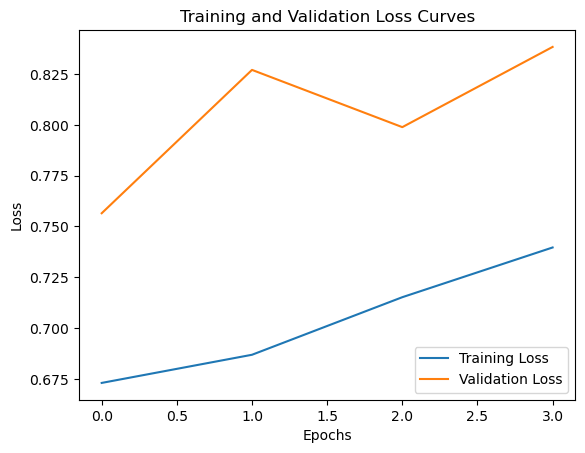

In [72]:
plt.plot(m3.history['loss'], label='Training Loss')
plt.plot(m3.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.show()

#### Predict using the early-stopped model and determine accuracy.

In [73]:
y_pred = model.predict(test_generator, steps=len(test_generator))
y_pred_classes = np.argmax(y_pred, axis=1)

1598/1598 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step


#### Out of all the runs, which model has the highest test data accuracy?

In [76]:
accuracy = accuracy_score(true_classes, y_pred_classes)
print("Accuracy:", accuracy)

Accuracy: 0.7817676856578458


Of all the runs, the one with the best accuracy was the first model where epochs = 30 and steps_per_epoch = 625. It had an accuracy of 80.18%

### Conceptual Questions: 

#### 5. Discuss the effect of the following on accuracy and loss (train & test): 
- Increasing the steps_per_epoch
- Increasing the number of epochs

Both increasing the steps_per_epoch and increasing the number of epochs allows you to train more samples, thus generalizing the data better and therefore have better training accuracy. However, if it overfits to the training data too much, then the testing accuracy will go down as we increase the steps_per_epoch. 

The effect on loss from increasing the steps_per_epoch is dependent on other factors like learning rate, but increasing the steps_per_epoch may lead to lower training loss because the model may converge faster.

Generally, increasing the number of epochs decreases the training loss tends as the model learns. However, if overfitting occurs, training loss may continue to decrease while validation loss starts increasing.

#### 6. Name two uses of zero padding in CNN.
(1) To preserve spatial dimensions and (2) To improve feature extraction

#### 7. What is the use of a 1 x 1 kernel in CNN? 
There are a several reasons for using a 1 x 1 kernel including to reduce dimensionality or introduce non-linearity if the data has more complex patterns.

#### 8. What are the advantages of a CNN over a fully connected DNN for this image classification problem?
One advantage is that CNN has fewer of parameters so it is faster to train, reduces the risk of overfitting and requires less training of the data. The second advantage is that CNN can generalize better than DNN since CNN can detech a particular feature once it has learned a kernel and it can then detect that feature anywhere in the image, whereas a DNN learns a feature in one location, it can detect it only in that particular location. Finally, CNNs embed prior knowledge of how the pixels are organized but DNNs do not. This provides an advantage when working with the images as the lower layers identify features in small areas of the images, and higher layers combine the lower-level features into larger features.